# Import packages

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [2]:
plt.style.use('fivethirtyeight')

**Import data**

In [3]:
data = pd.read_csv("Data Sets/ecommerce_data.csv")

**Show first 5 rows of data**

In [4]:
data.head()

,date,product_id,city_id,orders
0,2019-12-16,1897,26,2
1,2019-12-16,4850,26,4
2,2019-12-16,2466,26,1
3,2019-12-16,637,26,1
4,2019-12-16,3497,26,184


**Information of data sets**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523684 entries, 0 to 523683
Data columns (total 4 columns):
date          523684 non-null object
product_id    523684 non-null int64
city_id       523684 non-null int64
orders        523684 non-null int64
dtypes: int64(3), object(1)
memory usage: 16.0+ MB


In [6]:
str(data.date.dtypes)

'object'

**Lets bring date column on timestamp**

In [7]:
data["date"] = pd.to_datetime(data["date"])

In [8]:
str(data.date.dtypes)

'datetime64[ns]'

**Lets create some columns for better analysis**

In [9]:
# create year and month column from date column
data["year"] = data["date"].apply(lambda y : y.year)
data["month"] = data["date"].apply(lambda m : m.month)
data["day"] = data["date"].apply(lambda d : d.strftime('%A'))
data["week"] = data["date"].apply(lambda w : w.week)


# EDA

In [10]:
data.head()

,date,product_id,city_id,orders,year,month,day,week
0,2019-12-16,1897,26,2,2019,12,Monday,51
1,2019-12-16,4850,26,4,2019,12,Monday,51
2,2019-12-16,2466,26,1,2019,12,Monday,51
3,2019-12-16,637,26,1,2019,12,Monday,51
4,2019-12-16,3497,26,184,2019,12,Monday,51


**Lets set date as a index**

In [11]:
tm_data = data.set_index("date")

In [12]:
tm_data.head()

,product_id,city_id,orders,year,month,day,week
date,,,,,,,
2019-12-16,1897,26,2,2019,12,Monday,51
2019-12-16,4850,26,4,2019,12,Monday,51
2019-12-16,2466,26,1,2019,12,Monday,51
2019-12-16,637,26,1,2019,12,Monday,51
2019-12-16,3497,26,184,2019,12,Monday,51


**Lets sort the date for better analysis**

In [13]:
tm_data=tm_data.sort_index(axis = 0) 

**Yearwise analysis**

In [14]:
tm_data.year.unique()

array([2018, 2019], dtype=int64)

**Which year got the most transaction?**

In [15]:
tm_data.year.value_counts()

2019    347558
2018    176126
Name: year, dtype: int64

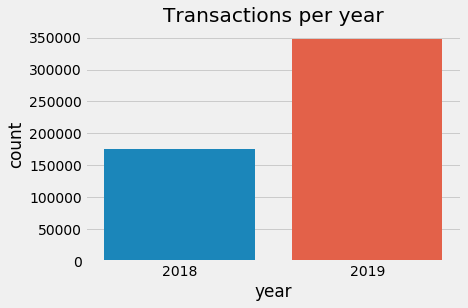

In [16]:
# Visualize 
plt.title("Transactions per year")
sns.countplot(x="year",data=tm_data)

**Which year got the most orders?**

In [17]:
byYear = tm_data.groupby("year").sum()

In [18]:
byYear

,product_id,city_id,orders,month,week
year,,,,,
2018,668955670,2938517,3757845,1736396,7196270
2019,1309955582,5598203,6836957,2350550,9621854


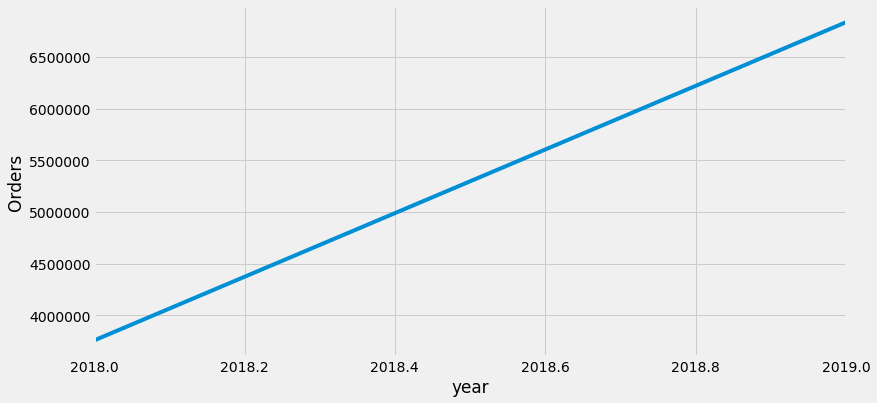

In [19]:
plt.figure(figsize=(12,6))
plt.ylabel("Orders")
byYear["orders"].plot()

Orders are increasing day by day

**Lets do some monthwise analysis**

In [44]:
tm_data.month.value_counts().head()

11    81330
10    72670
12    59458
7     58730
8     55238
Name: month, dtype: int64

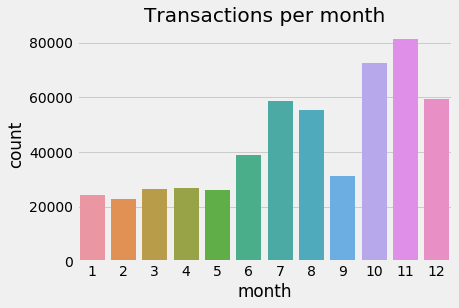

In [21]:
plt.title("Transactions per month")
sns.countplot(x='month',data=tm_data)

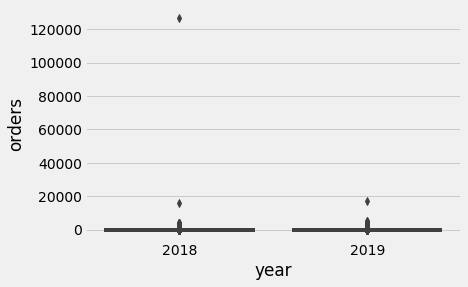

In [42]:
sns.boxplot(x="year",y="orders",data=tm_data)

In [28]:
byMonth = tm_data.groupby("month").sum()

**Simple plot of order per month**

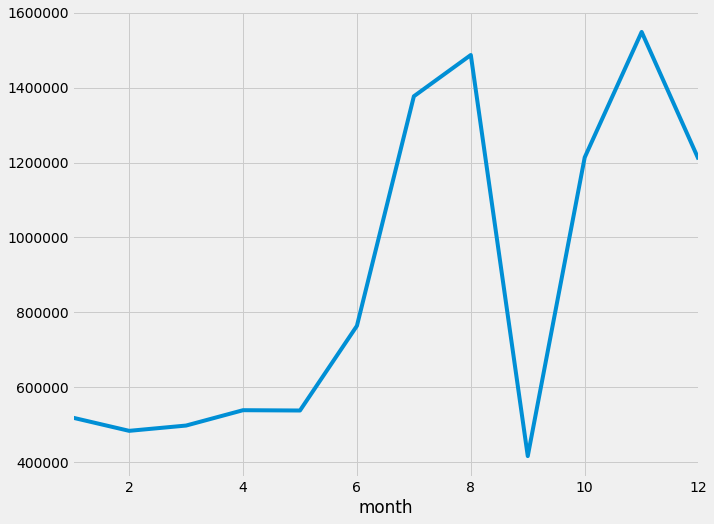

In [29]:
# Plot using matplotlib 
plt.figure(figsize=(10,8))
byMonth['orders'].plot()

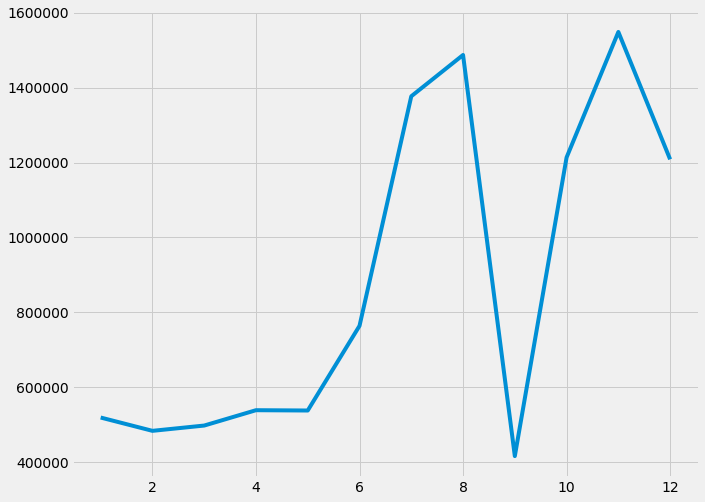

In [30]:
# Plot using seaborn
plt.figure(figsize=(10,8))
sns.lineplot(data=tm_data.groupby("month").sum()["orders"])

**Lets plot for 2018 and 2019 separately**

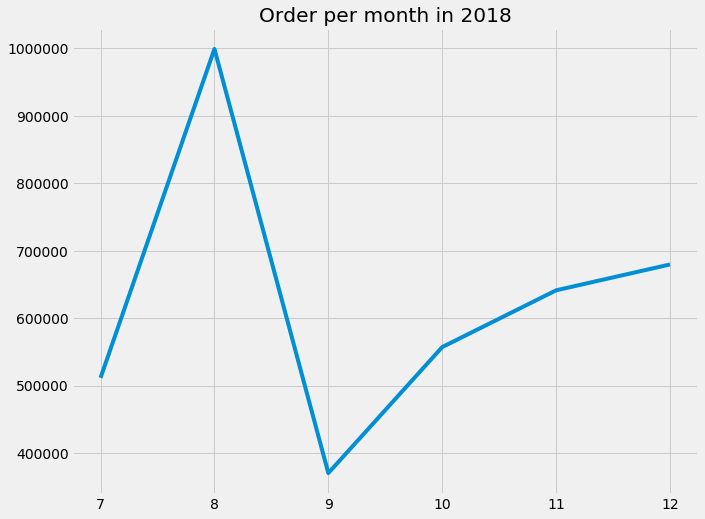

In [31]:
plt.figure(figsize=(10,8))
plt.title("Order per month in 2018")
_ =sns.lineplot(data=tm_data[tm_data["year"]==2018].groupby("month").sum()["orders"])

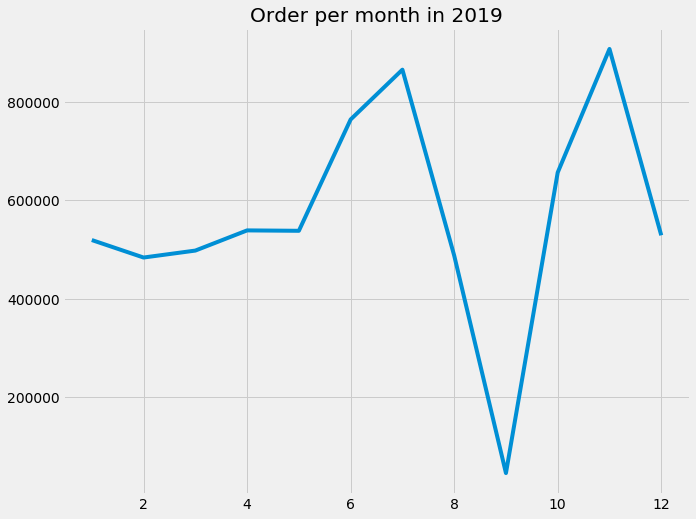

In [32]:
plt.figure(figsize=(10,8))
plt.title("Order per month in 2019")
_ =sns.lineplot(data=tm_data[tm_data["year"]==2019].groupby("month").sum()["orders"])

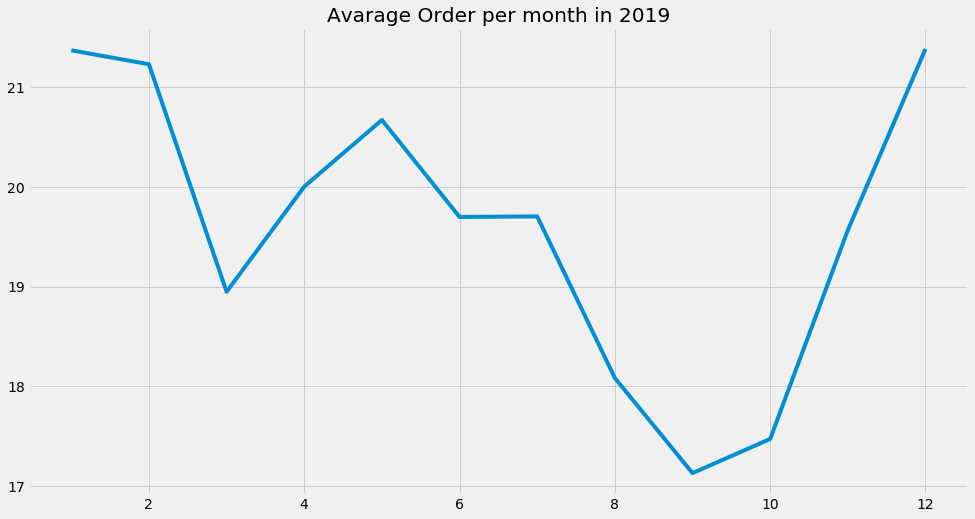

In [33]:
plt.figure(figsize=(15,8))
plt.title("Avarage Order per month in 2019")
_ =sns.lineplot(data=tm_data[tm_data["year"]==2019].groupby("month").mean()["orders"])

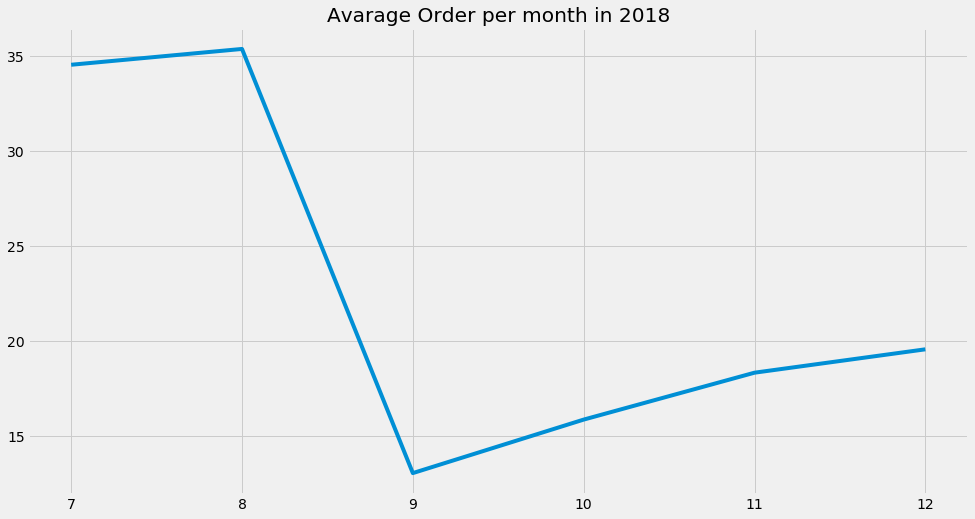

In [34]:
plt.figure(figsize=(15,8))
plt.title("Avarage Order per month in 2018")
_ =sns.lineplot(data=tm_data[tm_data["year"]==2018].groupby("month").mean()["orders"])

**Lets analysis Citywise**

In [35]:
tm_data["city_id"].unique()

array([14, 25, 13,  0,  4, 22, 18, 26,  1,  2, 23, 20, 27,  5, 16,  9, 17,
        7,  6, 29, 11, 28, 10, 24,  3, 21,  8, 30, 19, 12, 15],
      dtype=int64)

**From which cites got the most orders**

In [36]:
byCities = tm_data.groupby("city_id").sum()["orders"]

In [37]:
byCities = pd.DataFrame(byCities)

In [38]:
byCities.head()

,orders
city_id,
0,174157
1,162801
2,346816
3,313868
4,86543


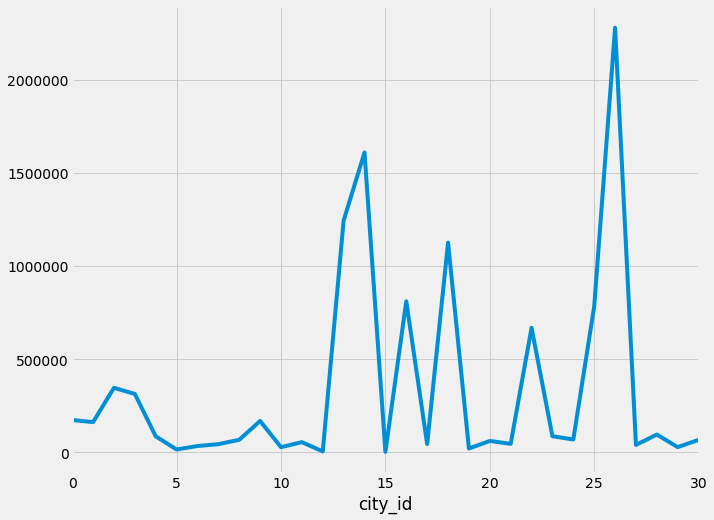

In [39]:
# Plot using matplotlib 
plt.figure(figsize=(10,8))
byCities["orders"].plot()

**Which City got the most transactions?**

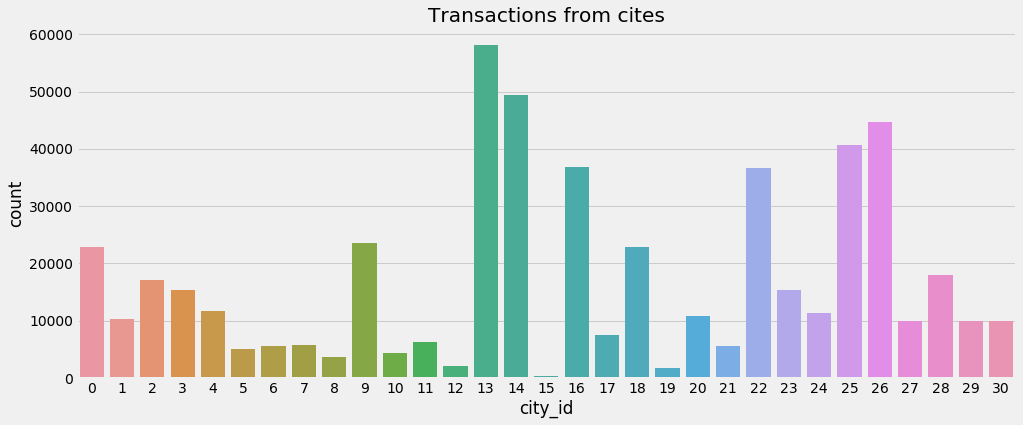

In [40]:
plt.figure(figsize=(15,6))
plt.title("Transactions from cites")
sns.countplot(x="city_id",data=tm_data)